# New-01.czi+New-03.czi Standardized vs. only centred vs. uncentred


In [1]:
# Import the masked image array (X) and the label vector (y)
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

with open('variables/new0103t3_valueArray_X.npy', 'rb') as f:
    X = np.load(f, allow_pickle=True)
with open('variables/new0103t3_labelArray_y.npy', 'rb') as f:
    y = np.load(f, allow_pickle=True)
    
# Create centred/standardized data arrays:
# X_std = StandardScaler().fit_transform(X)  # Centres and standardizes the data
# X_cen = StandardScaler(with_std=False).fit_transform(X) # Only centres the data


## Centred and standardized

In [ ]:
# New 01 + New-03, Centred and standardized
U_s,S_s,Vt_s = np.linalg.svd(X_std, full_matrices=False)
U_s2 = U_s[:,:2].copy()
XsSvd = U_s2 @ np.diag(S_s[:2])

Eigenvalues (Std): 
 [15.56649455  6.76959821  1.93460428  0.94763935  0.53211471  0.48477825
  0.46291905  0.43100348  0.38071669  0.36402442  0.33124621  0.31548834
  0.3035285   0.28317659  0.26832045  0.25980832  0.25310859  0.24996717
  0.23901952  0.23576071  0.22933203  0.22346429  0.2205036   0.21538454
  0.20450046  0.19836248  0.19208618  0.18557487  0.17084806  0.16077021
  0.14445054  0.12681793  0.11459051]


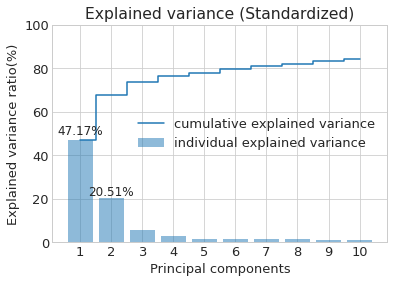

In [4]:
# Compute the eigenvalues and variances explained by the PCs of the std & centred data and plot them

eigvals_s = S_s**2/(X.shape[0]-1)
print('Eigenvalues (Std): \n', eigvals_s)

totVar_s = sum(eigvals_s)
varExp_s = [(i/totVar_s)*100 for i in sorted(eigvals_s, reverse=True)]
cumVarExp_s = np.cumsum(varExp_s)

with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots()
    barPlot = ax.bar(range(10), varExp_s[:10], alpha=0.5, align='center', label='individual explained variance')
    ax.step(range(10), cumVarExp_s[:10], where='mid', label='cumulative explained variance')
    ax.set_title('Explained variance (Standardized)')
    ax.set_ylabel('Explained variance ratio(%)')
    ax.set_xlabel('Principal components')
    ax.set_xticks(np.arange(0,10,1)), ax.set_xticklabels(np.arange(1,11,1))
    ax.set_ylim(0,100)
    ax.legend(loc='right', fontsize=13)
    ## Show the values on the bars with variance greater than or equal to 10%:
    labelBar = barPlot.datavalues[barPlot.datavalues>=10]
    for i in range(len(labelBar)):
        ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2 ,labelBar[i]*1.05,"{:.2f}%".format(labelBar[i]), ha="center",size=12)

In [3]:
import pandas as pd
dfXsvd_s = pd.DataFrame(XsSvd, columns=['pc1','pc2'])
dfXsvd_s['class'] = y

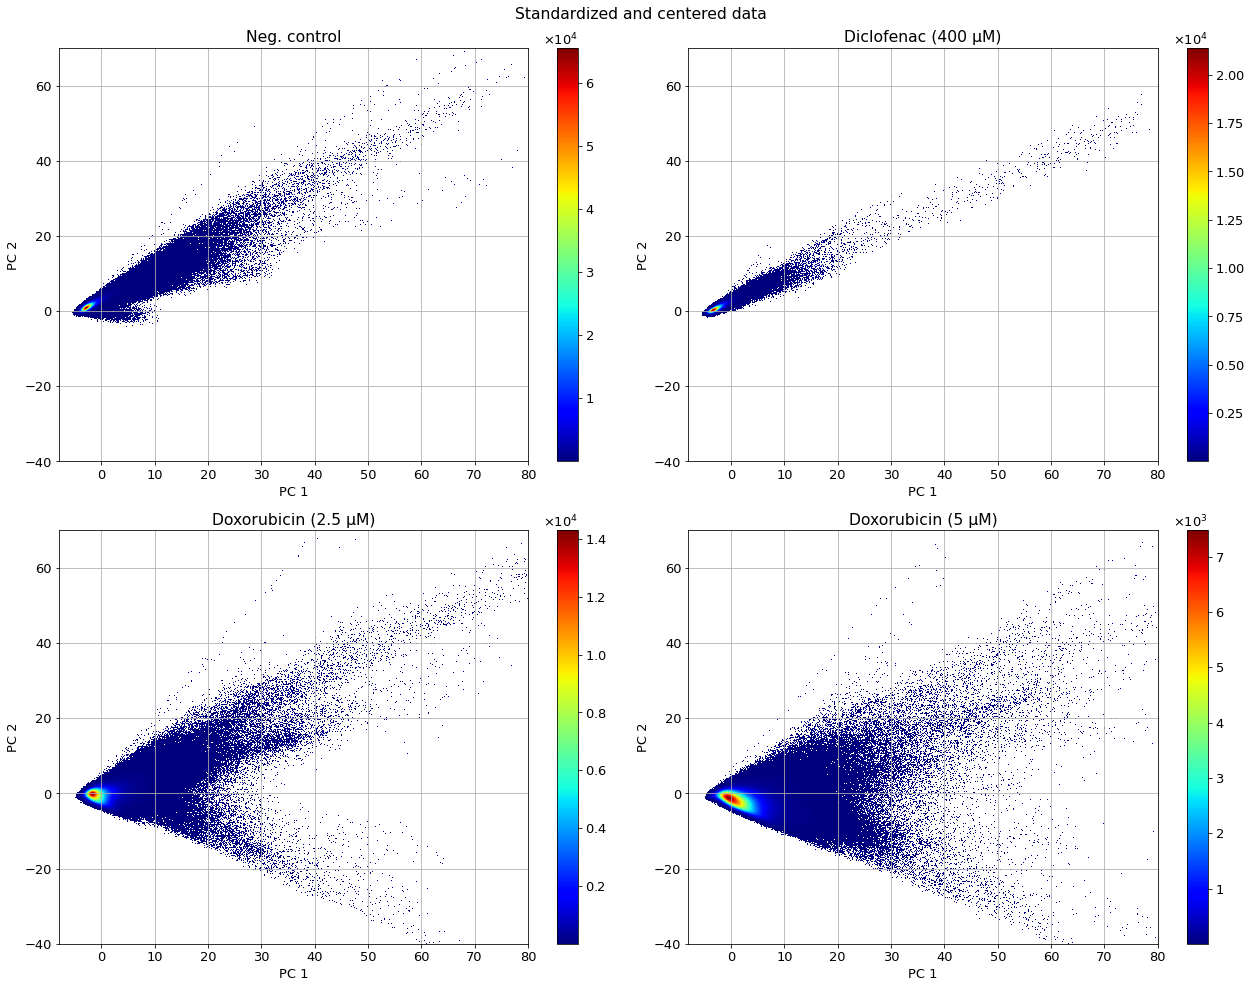

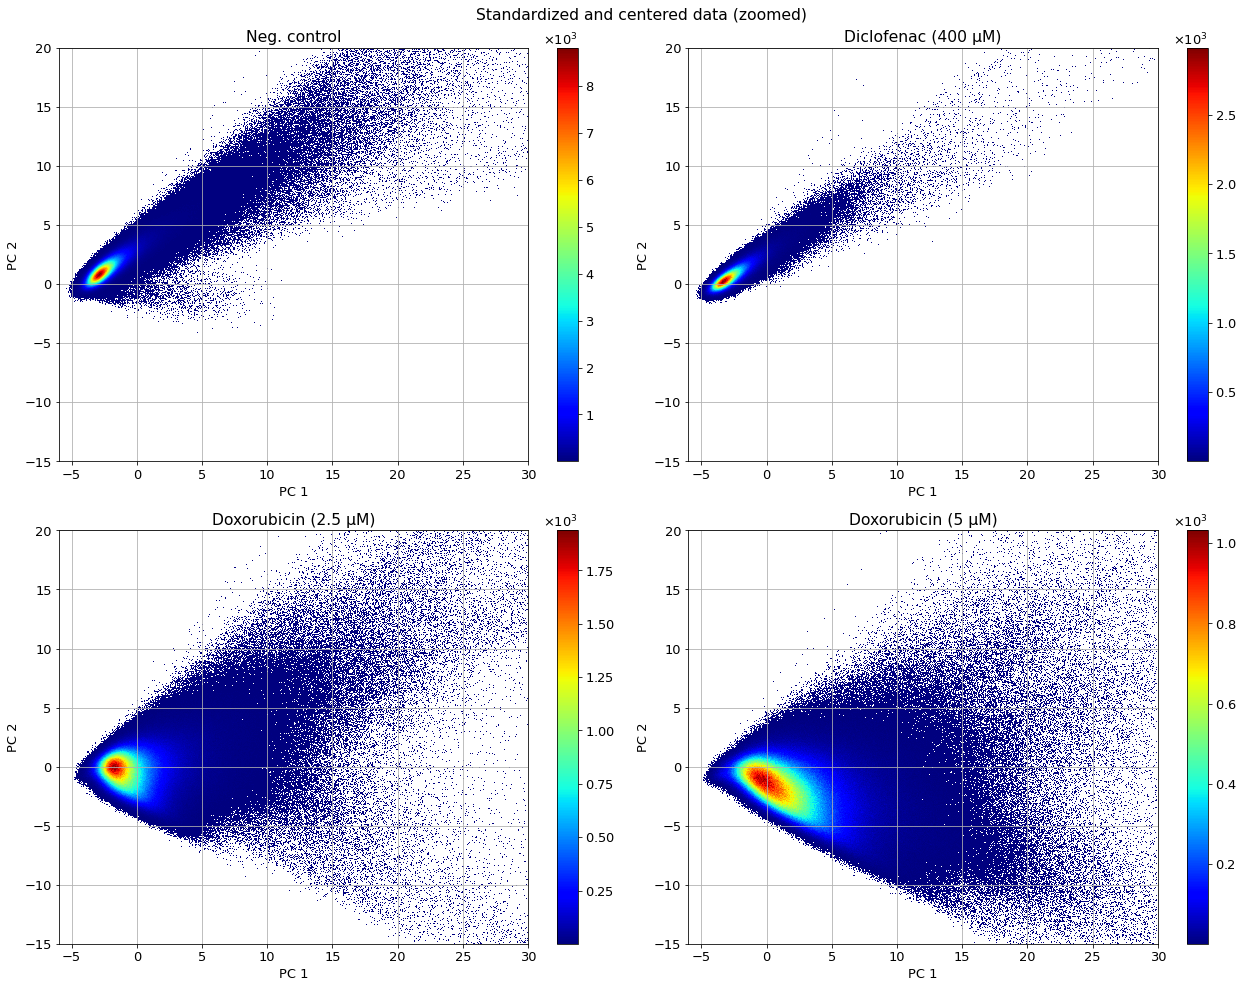

In [6]:
# Plot the projections of the standardized and centered data on the 1st and 2nd PCs

import datashader as ds
from datashader.mpl_ext import dsshow
# from matplotlib.colors import LogNorm
from matplotlib import colors
from matplotlib import ticker

fig2 = plt.figure(figsize=(18,14))

classDict = dict([('control','Neg. control'),('diclo1x','Diclofenac (400 µM)'),('doxo025x','Doxorubicin (2.5 µM)'),('doxo05x','Doxorubicin (5 µM)')])

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))

for i, lab in zip(range(4),('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax2 = fig2.add_subplot(2,2,i+1)
    densityPlot = dsshow(dfXsvd_s[dfXsvd_s["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax2)
    ax2.set_xlim(-8,80)#,ax.set_xticks([-175,-150,-125,-100,-75,-50,-25,0])
    ax2.set_ylim(-40,70)#,ax.set_yticks([-400,-350,-300,-250,-200,-150,-100,-50,0])
    # ax2.set_ylim(-15000,5000)#,ax.set_xticks([-175,-150,-125,-100,-75,-50,-25,0])
    # ax2.set_xlim(-500,15000)#,ax.set_yticks([-400,-350,-300,-250,-200,-150,-100,-50,0])
    ax2.set_xlabel('PC 1')
    ax2.set_ylabel('PC 2')
    # ax.set_ylim(yLim[i+1])
    # ax.set_xlim(-175,10)
    ax2.set_title(classDict[lab])
    ax2.grid(True)
    cbar = fig2.colorbar(densityPlot, format=fmt)
fig2.suptitle('Standardized and centered data')
fig2.tight_layout()
plt.show()

fig3 = plt.figure(figsize=(18,14))
for i, lab in zip(range(4), ('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax3 = fig3.add_subplot(2,2,i+1)
    densityPlot2 = dsshow(dfXsvd_s[dfXsvd_s["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax3)
    ax3.set_xlim(-6,30)
    ax3.set_ylim(-15,20)
    ax3.set_xlabel('PC 1')
    ax3.set_ylabel('PC 2')
    ax3.set_title(classDict[lab])
    ax3.grid(True)
    cbar = fig3.colorbar(densityPlot2, format=fmt)
fig3.suptitle('Standardized and centered data (zoomed)')
fig3.tight_layout()
plt.show()
# fig2.savefig("densityPlot2_0103.png")

In [10]:
np.amin(XsSvd, axis=0)

array([ -5.40420269, -76.49945252])

## Only Centred

### Subtraction of doxorubicin background

In [3]:
# with open('variables/doxBackgroundSpecMean.npy', 'rb') as f:
#     doxMean = np.load(f, allow_pickle=True)
# with open('variables/doxBackgroundSpecMedian.npy','rb') as f:
#     doxMedian = np.load(f,allow_pickle=True)
    
with open('variables/doxBackgroundSubtr/dox_t_array.npy','rb') as f:
    doxTArray = np.load(f,allow_pickle=True)

In [4]:
# doxMean.shape

doxT3Median = np.median(doxTArray[3], axis=0) # Get the median Dox. spectrum at t=12h
doxT3Median.shape

(33,)

In [5]:
# doxMedian = doxMedian.astype(int)
doxT3Median = doxT3Median.astype(int)

In [6]:
X[y=='doxo025x'] -= doxT3Median
X[y=='doxo05x'] -= doxT3Median

In [7]:
X = X.clip(min=0)
np.amin(X)

0

### Singular Value Decomposition

In [8]:
X_cen = StandardScaler(with_std=False).fit_transform(X) # Only centres the data

In [10]:
U_c,S_c,Vt_c = np.linalg.svd(X_cen, full_matrices=False)
U_c2 = U_c[:,:2].copy()
XcSvd = U_c2 @ np.diag(S_c[:2])

# np.save('variables/IntSVD_Xcentered.npy',X_cen)
# np.save('variables/IntSVD_U_c.npy',U_c)
# np.save('variables/IntSVD_S_c.npy',S_c)
# np.save('variables/IntSVD_Vt_c.npy',Vt_c)
# np.save('variables/IntSVD_X_c_PCs.npy',XcSvd)

# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_Xcentered.npy',X_cen)
# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_U_c.npy',U_c)
# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_S_c.npy',S_c)
# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_Vt_c.npy',Vt_c)
# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_X_c_PCs.npy',XcSvd)

In [13]:
# Table of principal components

import pandas as pd
chNos = np.full((33,),'PC ',dtype=object)+np.arange(1,34).astype(str)
# dfPCs = pd.DataFrame(Vt_c.T[:,0:5], columns=chNos)
dfPCs = pd.DataFrame(Vt_c.T, columns=chNos)

dfPCs

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33
0,-0.003358,-0.014608,-0.101699,0.201192,-0.005958,0.040699,0.041059,-0.040896,-0.013111,0.064408,...,-0.043329,0.132097,0.040947,0.020810,-0.214742,-0.008430,0.214609,-0.097789,0.888087,-0.090367
1,0.009200,0.032427,-0.155266,0.157189,0.036188,0.066315,0.008939,-0.047723,-0.001712,0.018573,...,0.002680,0.206727,0.181310,0.030511,-0.454050,-0.238143,0.494845,-0.379886,-0.403663,-0.016587
2,0.024939,0.075080,-0.098015,-0.065184,0.065346,0.040473,-0.051298,-0.006989,0.020584,-0.082179,...,0.148250,0.089434,0.292212,-0.029065,-0.085585,-0.737314,-0.416520,0.252222,0.084079,0.012447
3,0.038507,0.112886,-0.169675,-0.038482,0.090508,0.068863,-0.064141,-0.025101,0.022968,-0.101904,...,0.279898,0.214164,0.589534,0.021484,0.298603,0.467969,0.005743,0.014972,0.007575,0.003008
4,0.056311,0.162520,-0.189844,-0.118212,0.111381,0.070155,-0.095852,-0.014862,0.033612,-0.155020,...,0.359746,-0.025924,-0.669320,0.014788,-0.074212,0.056473,0.026587,0.005528,0.031232,0.007038
5,0.068289,0.199165,-0.256375,-0.012944,0.100489,0.087923,-0.065633,-0.038588,0.020950,-0.097634,...,-0.725510,-0.363756,0.039590,-0.004636,0.073772,0.033352,-0.035619,0.018853,-0.011820,-0.001860
6,0.085086,0.240610,-0.255187,-0.089881,0.100897,0.075458,-0.087415,-0.020159,0.024898,-0.130888,...,0.181386,0.056667,-0.045796,0.005567,-0.008134,0.020740,0.009526,-0.000787,0.008159,0.001117
7,0.090327,0.255430,-0.216501,-0.153058,0.080740,0.048946,-0.091900,0.004426,0.026524,-0.137619,...,-0.143756,0.042635,-0.003260,0.011187,-0.043148,0.011147,0.026012,-0.006115,0.029099,0.002329
8,0.096844,0.273184,-0.198668,-0.119797,0.052164,0.034277,-0.065329,0.004627,0.013194,-0.081235,...,-0.003022,0.109636,0.019519,0.010919,-0.048532,0.003270,0.025037,-0.009930,0.020000,0.002111
9,0.102351,0.298302,-0.255405,0.165175,-0.009907,0.059354,0.047425,-0.073919,-0.039127,0.167228,...,0.089721,-0.106639,0.000038,-0.012536,0.061113,-0.018962,-0.041003,0.010301,-0.035987,-0.005859


In [12]:
# Save the table of PCs as a CSV file
dfPCs.to_csv('pcList.csv')

Eigenvalues (Centr.): 
 [3.24965566e+05 1.76590663e+05 1.98237989e+04 1.13248919e+04
 7.88405120e+03 7.56061193e+03 7.38108070e+03 7.11880004e+03
 6.79173246e+03 6.38940149e+03 6.23454547e+03 5.88551348e+03
 5.38289293e+03 5.23588843e+03 4.94507342e+03 4.68621884e+03
 4.45761401e+03 4.34163254e+03 4.24994876e+03 4.10962044e+03
 3.71287800e+03 3.61230336e+03 3.49257188e+03 3.33964746e+03
 3.16976164e+03 2.70960928e+03 2.54409811e+03 2.19835584e+03
 1.91897167e+03 1.75178909e+03 1.69997038e+03 7.65046989e+02
 6.06293897e+01]


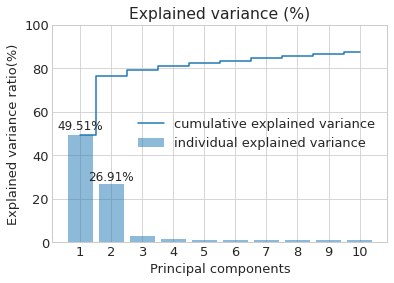

In [11]:
# Compute the eigenvalues and variances explained by the PCs of the centred data and plot them

eigvals_c = S_c**2/(X.shape[0]-1)
print('Eigenvalues (Centr.): \n', eigvals_c)

totVar_c = sum(eigvals_c)
varExp_c = [(i/totVar_c)*100 for i in sorted(eigvals_c, reverse=True)]
cumVarExp_c = np.cumsum(varExp_c)

with plt.style.context('seaborn-whitegrid'):
    fig4,ax4 = plt.subplots()
    barPlot2 = ax4.bar(range(10), varExp_c[:10], alpha=0.5, align='center', label='individual explained variance')
    ax4.step(range(10), cumVarExp_c[:10], where='mid', label='cumulative explained variance')
    ax4.set_title('Explained variance (%)')
    ax4.set_ylabel('Explained variance ratio(%)')
    ax4.set_xlabel('Principal components')
    ax4.set_xticks(np.arange(0,10,1)), ax4.set_xticklabels(np.arange(1,11,1))
    ax4.set_ylim(0,100)
    ax4.legend(loc='right', fontsize=13)
    ## Show the values on the bars with variance greater than or equal to 10%:
    labelBar2 = barPlot2.datavalues[barPlot2.datavalues>=10]
    for i in range(len(labelBar2)):
        ax4.text(ax4.patches[i].get_x()+ax4.patches[i].get_width()/2 ,labelBar2[i]*1.05,"{:.2f}%".format(labelBar2[i]), ha="center",size=12)
        
# np.save('variables/IntSVD_eigvals_c.npy',eigvals_c)
# np.save('variables/IntSVD_varExp_c.npy',varExp_c)

# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_eigvals_c.npy',eigvals_c)
# np.save('variables/doxBackgroundSubtr/IntSVD_DoxBg_varExp_c.npy',varExp_c)

In [10]:
# fig4.savefig("expVar0103t3.pdf")
fig4.savefig("plots/expVar0103t3DoxSubtracted.svg")

In [27]:
import pandas as pd
dfXsvd_c = pd.DataFrame(XcSvd, columns=['pc1','pc2'])
dfXsvd_c['class'] = y

In [ ]:
def drawVector(v0, v1, col, ax=None, label=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=1, shrinkA=0, shrinkB=0, color=col)
    ax.annotate(label, v1, v0, arrowprops=arrowprops)

    

In [ ]:
v = Vt_c.T[:,:4] @ np.sqrt(np.diag(eigvals_c[:4])) #(np.diag(S_c[:4])/np.sqrt((X.shape[0]-1)))
v

In [5]:
XcSvd.shape

(10626302, 2)

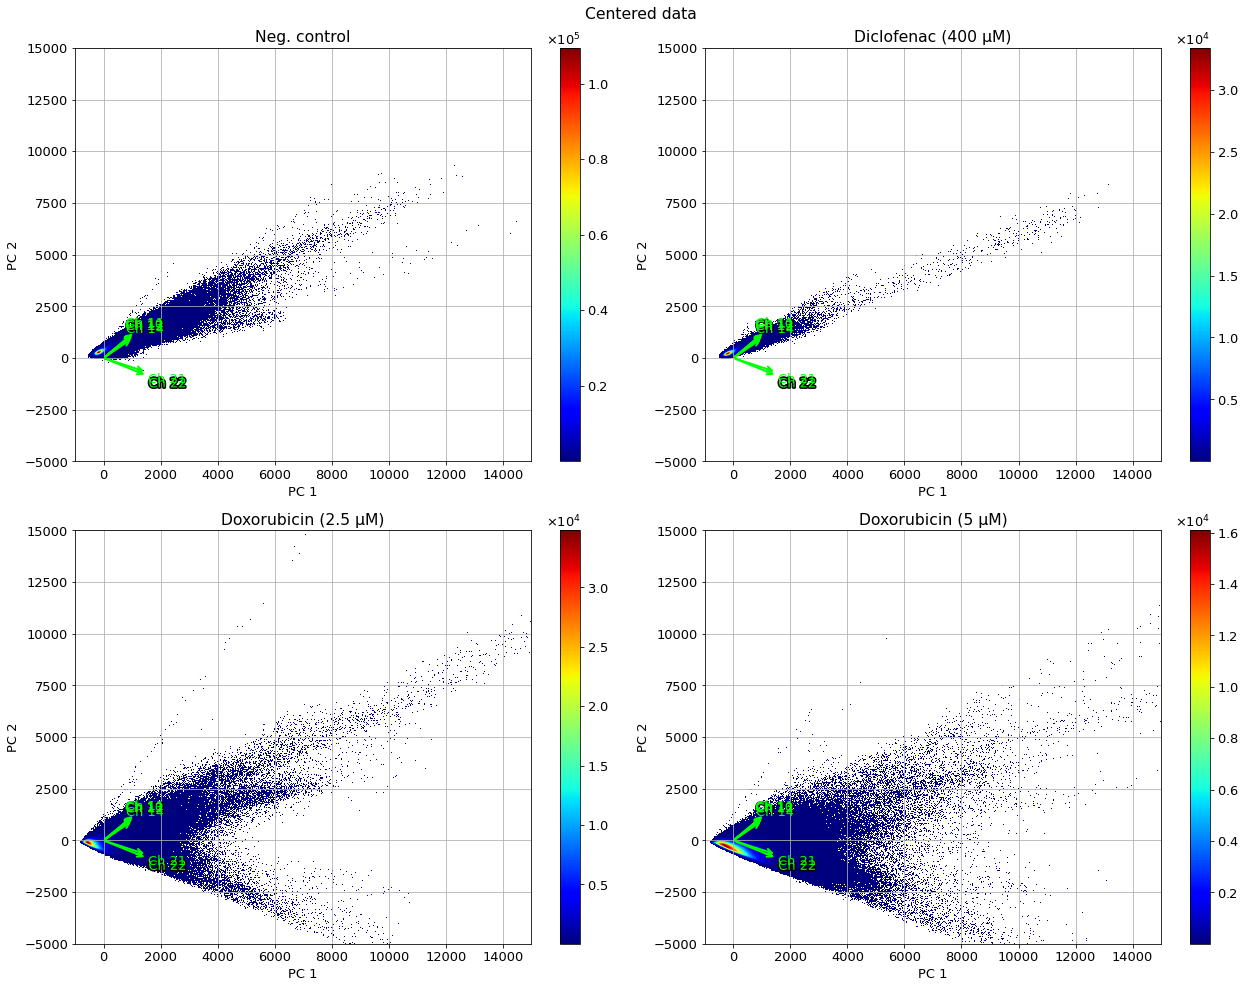

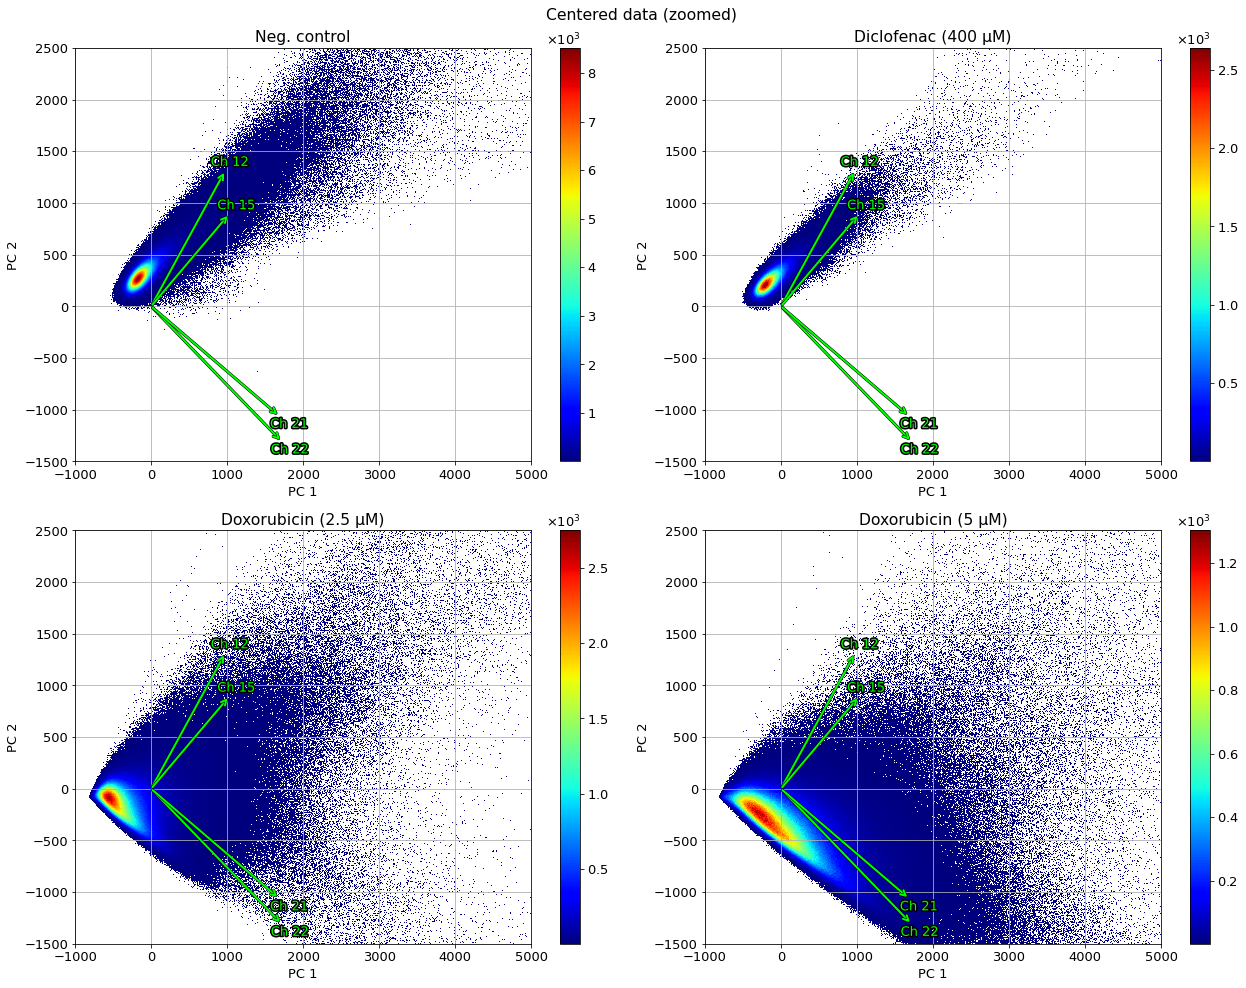

In [30]:
import datashader as ds
from datashader.mpl_ext import dsshow
# from matplotlib.colors import LogNorm
from matplotlib import colors
from matplotlib import ticker
from matplotlib import patheffects

fig5 = plt.figure(figsize=(18,14))

classDict = dict([('control','Neg. control'),('diclo1x','Diclofenac (400 µM)'),('doxo025x','Doxorubicin (2.5 µM)'),('doxo05x','Doxorubicin (5 µM)')])

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))

for i, lab in zip(range(4),('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax5 = fig5.add_subplot(2,2,i+1)
    densityPlot3 = dsshow(dfXsvd_c[dfXsvd_c["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax5)
    # ax5.set_xlim(-10,80)#,ax.set_xticks([-175,-150,-125,-100,-75,-50,-25,0])
    # ax5.set_ylim(-50,80)#,ax.set_yticks([-400,-350,-300,-250,-200,-150,-100,-50,0])
    ax5.set_ylim(-5000,15000)#,ax.set_xticks([-175,-150,-125,-100,-75,-50,-25,0])
    ax5.set_xlim(-1000,15000)#,ax.set_yticks([-400,-350,-300,-250,-200,-150,-100,-50,0])
    ax5.set_xlabel('PC 1')
    ax5.set_ylabel('PC 2')
    # ax.set_ylim(yLim[i+1])
    # ax.set_xlim(-175,10)
    ax5.set_title(classDict[lab])
    ax5.grid(True)
    cbar = fig5.colorbar(densityPlot3, format=fmt)
    v1 = ax5.annotate('Ch 22', (0,0), (Vt_c.T[21,0]*5000,Vt_c.T[21,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime', path_effects=[patheffects.withStroke(linewidth=3, foreground="k")]),
    #v1.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=5, foreground="k"), patheffects.Normal()])
    v2 = ax5.annotate('Ch 12', (0,0), (Vt_c.T[11,0]*5000,Vt_c.T[11,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime', path_effects=[patheffects.withStroke(linewidth=3, foreground="k")]), 
    #v2.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=5, foreground="k"), patheffects.Normal()])
    ax5.annotate('Ch 10', (0,0), (Vt_c.T[9,0]*5000,Vt_c.T[9,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime')
    ax5.annotate('Ch 11', (0,0), (Vt_c.T[10,0]*5000,Vt_c.T[10,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime')
    ax5.annotate('Ch 13', (0,0), (Vt_c.T[12,0]*5000,Vt_c.T[12,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime')
    ax5.annotate('Ch 14', (0,0), (Vt_c.T[13,0]*5000,Vt_c.T[13,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime')
    ax5.annotate('Ch 21', (0,0), (Vt_c.T[20,0]*5000,Vt_c.T[20,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime')

            
fig5.suptitle('Centered data')
fig5.tight_layout()
plt.show()

fig6 = plt.figure(figsize=(18,14))
for i, lab in zip(range(4), ('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax6 = fig6.add_subplot(2,2,i+1)
    densityPlot4 = dsshow(dfXsvd_c[dfXsvd_c["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax6)
    # ax6.set_xlim(-10,20)
    # ax6.set_ylim(-10,20)
    ax6.set_xlim(-1000,5000)
    ax6.set_ylim(-1500,2500)
    ax6.set_xlabel('PC 1')
    ax6.set_ylabel('PC 2')
    ax6.set_title(classDict[lab])
    ax6.grid(True)
    cbar = fig6.colorbar(densityPlot4, format=fmt)
    v1 = ax6.annotate('Ch 22', (0,0), (Vt_c.T[21,0]*5000,Vt_c.T[21,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime',
                 path_effects=[patheffects.withStroke(linewidth=3, foreground="k")])
    v1.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground="k"), patheffects.Normal()])
    v2 = ax6.annotate('Ch 12', xy=(0,0), xytext=(Vt_c.T[11,0]*5000,Vt_c.T[11,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime',
                 path_effects=[patheffects.withStroke(linewidth=3, foreground="k")])
    v2.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground="k"), patheffects.Normal()])
    #ax6.annotate('Ch 17', (0,0), (Vt_c.T[16,0]*5000,Vt_c.T[16,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=1), color='lime')
    v3 = ax6.annotate('Ch 15', (0,0), (Vt_c.T[14,0]*5000,Vt_c.T[14,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime', path_effects=[patheffects.withStroke(linewidth=3, foreground="k")])
    v3.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground="k"), patheffects.Normal()])
    v4 = ax6.annotate('Ch 21', (0,0), (Vt_c.T[20,0]*5000,Vt_c.T[20,1]*5000), arrowprops=dict(color='lime',arrowstyle='<-',linewidth=2), color='lime', path_effects=[patheffects.withStroke(linewidth=3, foreground="k")])
    v4.arrow_patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground="k"), patheffects.Normal()])
fig6.suptitle('Centered data (zoomed)')
fig6.tight_layout()
plt.show()
# fig2.savefig("densityPlot2_0103.png")

In [8]:
print("Neg. control mean: ",np.mean(XcSvd[y=='control',0]),",", np.mean(XcSvd[y=='control',1]))
print("Diclofenac mean: ",np.mean(XcSvd[y=='diclo1x',0]),",", np.mean(XcSvd[y=='diclo1x',1]))
print("Doxo 2.5 µM mean: ",np.mean(XcSvd[y=='doxo025x',0]),",", np.mean(XcSvd[y=='doxo025x',1]))
print("Doxo 5 µM mean: ",np.mean(XcSvd[y=='doxo05x',0]),",", np.mean(XcSvd[y=='doxo05x',1]))

Neg. control mean:  -400.70056825032674 , 178.1645470261568
Diclofenac mean:  -444.7666119944478 , 79.42677858375816
Doxo 2.5 µM mean:  53.060879192548825 , -14.43503687904555
Doxo 5 µM mean:  518.09905992349 , -203.35355971748228


In [6]:
# fig5.savefig("densityPlot1_0103cen.png")
fig6.savefig("densityPlot2_0103cen.png")

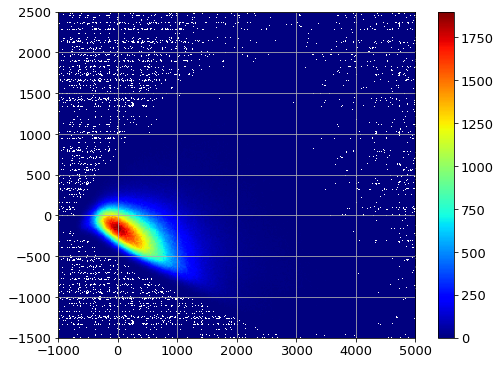

In [5]:
import mpl_scatter_density
from matplotlib import cm
cmap = cm.get_cmap('jet').copy()
cmap.set_under(color='w')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='scatter_density')
density = ax.scatter_density(XcSvd[y=='doxo05x',0], XcSvd[y=='doxo05x',1], cmap=cmap)
ax.set_xlim(-1000,5000)
ax.set_ylim(-1500,2500)
ax.grid(True)
fig.colorbar(density)
plt.show()

In [10]:
ax.Axis.get_data_interval()

AttributeError: 'ScatterDensityAxesSubplot' object has no attribute 'Axis'

## Unstandardized, uncentered

In [2]:
# No data pre-treatment
U, S, Vt = np.linalg.svd(X, full_matrices=False)
U_2 = U[:,:2].copy()
XSvd = U_2 @ np.diag(S[:2])

In [9]:
U_2[:,0] *= -1
XSvd = U_2 @ np.diag(S[:2])

Eigenvalues (Uncentr.): 
 [1.83687152e+06 1.53773407e+05 2.55225771e+04 1.16113010e+04
 8.10928585e+03 7.98886548e+03 7.65543281e+03 7.31434898e+03
 6.98561246e+03 6.81419369e+03 6.50867996e+03 6.38165872e+03
 6.02101064e+03 5.71819237e+03 5.55657929e+03 5.31235135e+03
 5.12171699e+03 4.97416681e+03 4.55650921e+03 4.35461624e+03
 4.27573507e+03 3.95515785e+03 3.81454295e+03 3.70912728e+03
 3.63609513e+03 3.05715642e+03 2.80417317e+03 2.43646859e+03
 2.20746502e+03 1.97382764e+03 1.78532582e+03 1.10647301e+03
 8.85918852e+01]


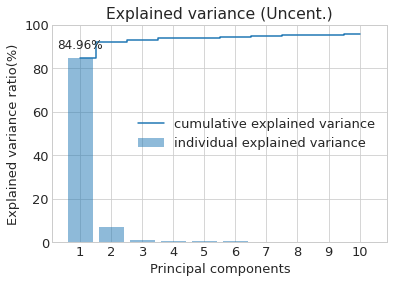

In [10]:
# Compute the eigenvalues and variances explained by the PCs of the raw data and plot them

eigvals = S**2/(X.shape[0]-1)
print('Eigenvalues (Uncentr.): \n', eigvals)

totVar = sum(eigvals)
varExp = [(i/totVar)*100 for i in sorted(eigvals, reverse=True)]
cumVarExp = np.cumsum(varExp)

with plt.style.context('seaborn-whitegrid'):
    fig7,ax7 = plt.subplots()
    barPlot3 = ax7.bar(range(10), varExp[:10], alpha=0.5, align='center', label='individual explained variance')
    ax7.step(range(10), cumVarExp[:10], where='mid', label='cumulative explained variance')
    ax7.set_title('Explained variance (Uncent.)')
    ax7.set_ylabel('Explained variance ratio(%)')
    ax7.set_xlabel('Principal components')
    ax7.set_xticks(np.arange(0,10,1)), ax7.set_xticklabels(np.arange(1,11,1))
    ax7.set_ylim(0,100)
    ax7.legend(loc='right', fontsize=13)
    ## Show the values on the bars with variance greater than or equal to 10%:
    labelBar3 = barPlot3.datavalues[barPlot3.datavalues>=10]
    for i in range(len(labelBar3)):
        ax7.text(ax7.patches[i].get_x()+ax7.patches[i].get_width()/2 ,labelBar3[i]*1.05,"{:.2f}%".format(labelBar3[i]), ha="center",size=12)

In [11]:
import pandas as pd
dfXsvd = pd.DataFrame(XSvd, columns=['pc1','pc2'])
dfXsvd['class'] = y

In [14]:
np.amax(XSvd, axis=0), np.amin(XSvd, axis=0)

(array([45358.99644066, 27519.60030164]),
 array([   322.58961379, -14975.85622674]))

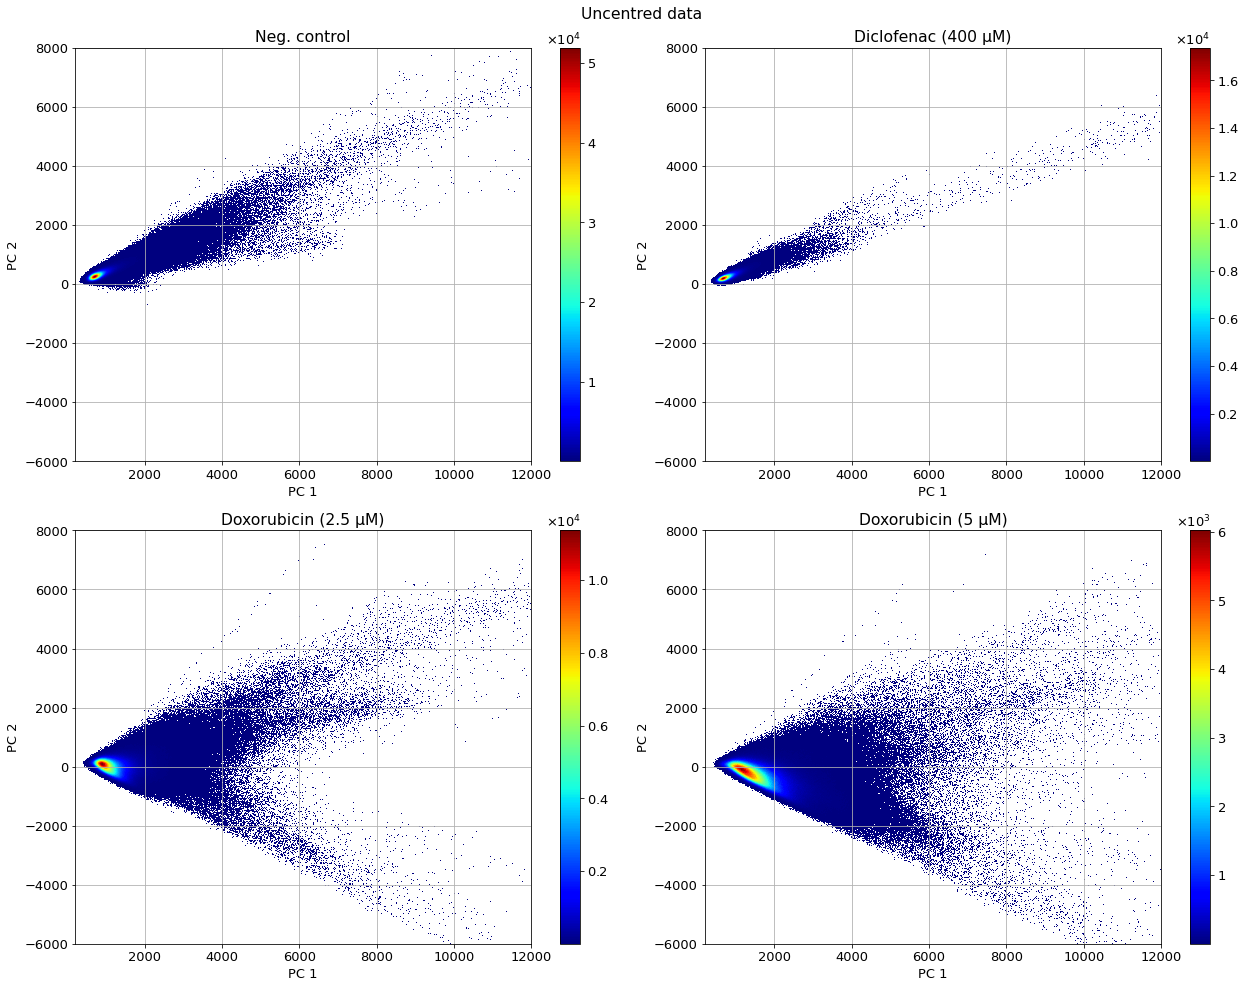

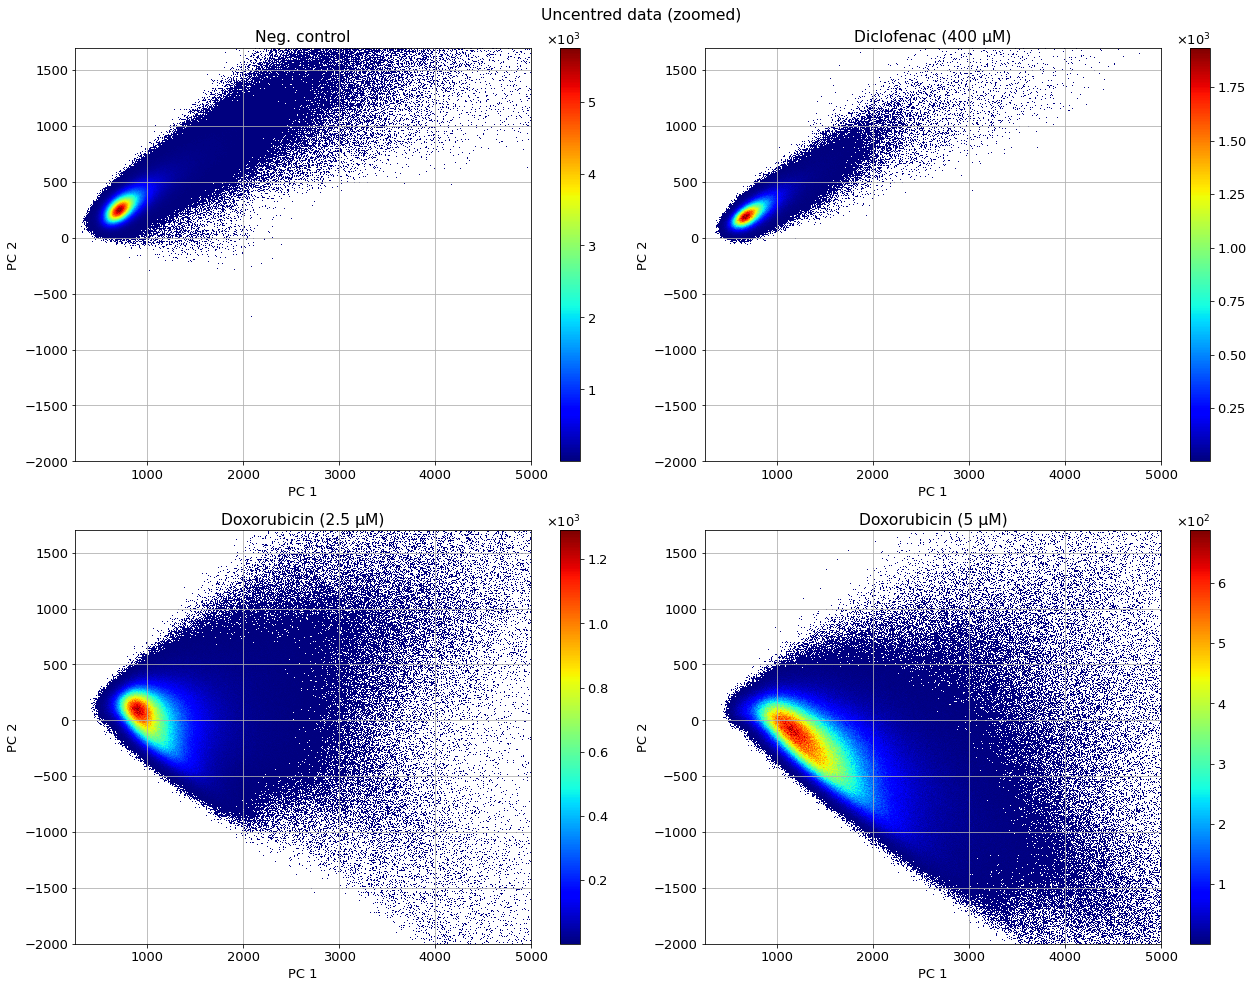

In [22]:
import datashader as ds
from datashader.mpl_ext import dsshow
# from matplotlib.colors import LogNorm
from matplotlib import colors
from matplotlib import ticker

fig8 = plt.figure(figsize=(18,14))

classDict = dict([('control','Neg. control'),('diclo1x','Diclofenac (400 µM)'),('doxo025x','Doxorubicin (2.5 µM)'),('doxo05x','Doxorubicin (5 µM)')])

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))

for i, lab in zip(range(4),('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax8 = fig8.add_subplot(2,2,i+1)
    densityPlot5 = dsshow(dfXsvd[dfXsvd["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax8)
    # ax8.set_xlim(-10,80)
    # ax8.set_ylim(-50,80)
    ax8.set_ylim(-6000,8000)
    ax8.set_xlim(200,12000)
    ax8.set_xlabel('PC 1')
    ax8.set_ylabel('PC 2')
    ax8.set_title(classDict[lab])
    ax8.grid(True)
    cbar5 = fig8.colorbar(densityPlot5, format=fmt)
fig8.suptitle('Uncentred data')
fig8.tight_layout()
plt.show()

fig9 = plt.figure(figsize=(18,14))
for i, lab in zip(range(4), ('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax9 = fig9.add_subplot(2,2,i+1)
    densityPlot6 = dsshow(dfXsvd[dfXsvd["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax9)
    # ax9.set_xlim(-10,20)
    # ax9.set_ylim(-10,20)
    ax9.set_xlim(250,5000)
    ax9.set_ylim(-2000,1700)
    ax9.set_xlabel('PC 1')
    ax9.set_ylabel('PC 2')
    ax9.set_title(classDict[lab])
    ax9.grid(True)
    cbar6 = fig9.colorbar(densityPlot6, format=fmt)
fig9.suptitle('Uncentred data (zoomed)')
fig9.tight_layout()
plt.show()
# fig2.savefig("densityPlot2_0103.png")

In [23]:
fig8.savefig("densityPlot1_0103.png")
fig9.savefig("densityPlot2_0103.png")

## Projecting onto the 2$\mathrm{^{nd}}$ and 3$\mathrm{^{rd}}$ PCs

In [5]:
U_c23 = U_c[:,1:3].copy()
XcSvd2 = U_c23 @ np.diag(S_c[1:3])

In [6]:
import pandas as pd
dfXsvd2 = pd.DataFrame(XcSvd2, columns=['pc2','pc3'])
dfXsvd2['class'] = y

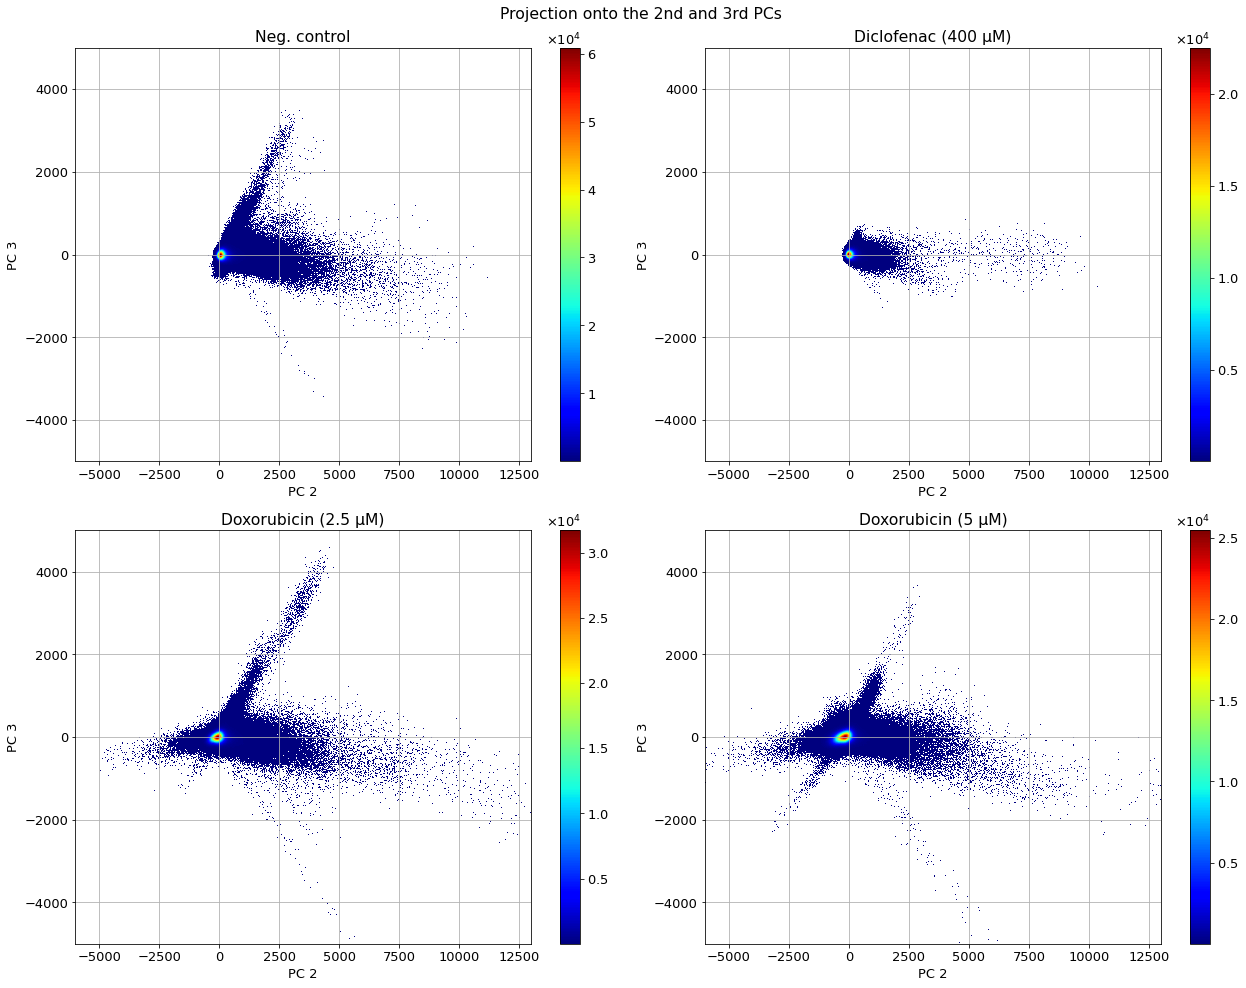

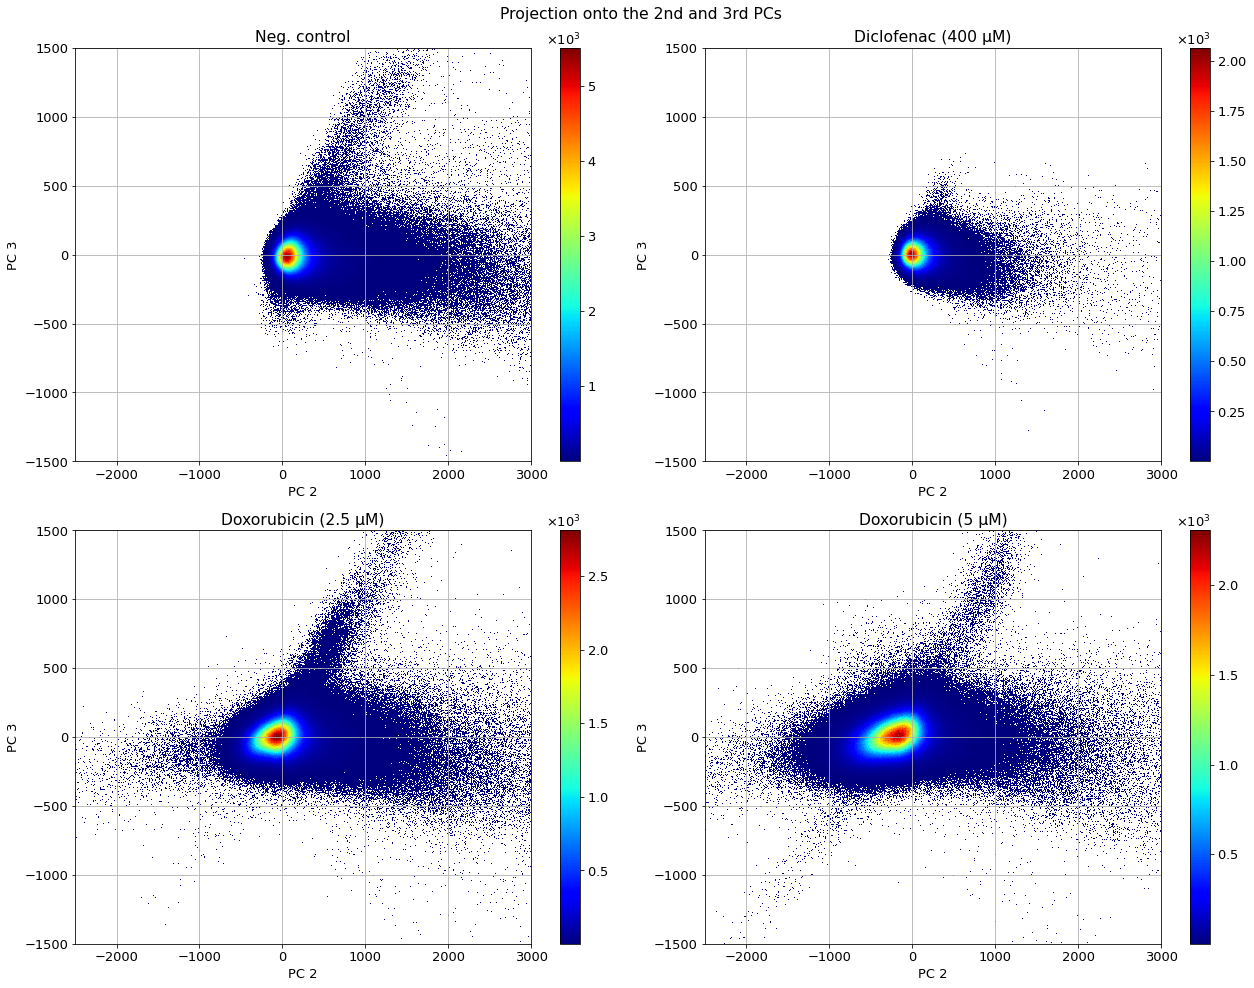

In [8]:
import datashader as ds
from datashader.mpl_ext import dsshow
# from matplotlib.colors import LogNorm
from matplotlib import colors
from matplotlib import ticker

fig8 = plt.figure(figsize=(18,14))

classDict = dict([('control','Neg. control'),('diclo1x','Diclofenac (400 µM)'),('doxo025x','Doxorubicin (2.5 µM)'),('doxo05x','Doxorubicin (5 µM)')])

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))

for i, lab in zip(range(4),('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax8 = fig8.add_subplot(2,2,i+1)
    densityPlot5 = dsshow(dfXsvd2[dfXsvd2["class"]==lab], ds.Point('pc2','pc3'), ds.count(), cmap='jet', aspect='auto', ax=ax8)
    # ax8.set_xlim(-10,80)
    # ax8.set_ylim(-50,80)
    ax8.set_ylim(-5000,5000)
    ax8.set_xlim(-6000,13000)
    ax8.set_xlabel('PC 2')
    ax8.set_ylabel('PC 3')
    ax8.set_title(classDict[lab])
    ax8.grid(True)
    cbar5 = fig8.colorbar(densityPlot5, format=fmt)
fig8.suptitle('Projection onto the 2nd and 3rd PCs')
fig8.tight_layout()
plt.show()

fig9 = plt.figure(figsize=(18,14))
for i, lab in zip(range(4), ('control', 'diclo1x', 'doxo025x', 'doxo05x')):
    ax9 = fig9.add_subplot(2,2,i+1)
    densityPlot6 = dsshow(dfXsvd2[dfXsvd2["class"]==lab], ds.Point('pc2','pc3'), ds.count(), cmap='jet', aspect='auto', ax=ax9)
    # ax9.set_xlim(-10,20)
    # ax9.set_ylim(-10,20)
    ax9.set_xlim(-2500,3000)
    ax9.set_ylim(-1500,1500)
    ax9.set_xlabel('PC 2')
    ax9.set_ylabel('PC 3')
    ax9.set_title(classDict[lab])
    ax9.grid(True)
    cbar6 = fig9.colorbar(densityPlot6, format=fmt)
fig9.suptitle('Projection onto the 2nd and 3rd PCs')
fig9.tight_layout()
plt.show()
# fig2.savefig("densityPlot2_0103.png")

In [9]:
fig8.savefig("densityPlotPC23_1.png")
fig9.savefig("densityPlotPC23_2.png")

# $t=0$ & $t=6$

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

with open('variables/new0103t0_valueArray_X.npy', 'rb') as f:
    X1 = np.load(f, allow_pickle=True)
with open('variables/new0103t0_labelArray_y.npy', 'rb') as f:
    y1 = np.load(f, allow_pickle=True)

with open('variables/new0103t6_valueArray_X.npy', 'rb') as f:
    X7 = np.load(f, allow_pickle=True)
with open('variables/new0103t6_labelArray_y.npy', 'rb') as f:
    y7 = np.load(f, allow_pickle=True)
# Create centred/standardized data arrays:
# X_std = StandardScaler().fit_transform(X)  # Centres and standardizes the data
X1_cen = StandardScaler(with_std=False).fit_transform(X1) # Only centres the data
X7_cen = StandardScaler(with_std=False).fit_transform(X7) # Only centres the data

# np.save('variables/IntSVDt0_Xcentered.npy',X1_cen)
# np.save('variables/IntSVDt6_Xcentered.npy',X7_cen)


In [3]:
import datashader as ds
from datashader.mpl_ext import dsshow
# from matplotlib.colors import LogNorm
from matplotlib import colors
from matplotlib import ticker
import pandas as pd

def svd(X,nPCs):
    U,S,Vt = np.linalg.svd(X, full_matrices=False)
    U_n = U[:,:nPCs].copy()
    XSvd = U_n @ np.diag(S[:nPCs])
    return U,S,Vt,XSvd

def expvar(S,X):
    eigvals = S**2/(X.shape[0]-1)
    varExp = [(i/sum(eigvals))*100 for i in sorted(eigvals, reverse=True)]
    cumVarExp = np.cumsum(varExp)
    return varExp, cumVarExp

def expvarplot(exp_var,cum_exp_var, n_pcs=None ,title='Explained variance'):
    n_pcs = (len(exp_var) if n_pcs==None else n_pcs)
    with plt.style.context('seaborn-whitegrid'):
        fig, ax = plt.subplots()
        bar = ax.bar(range(n_pcs), exp_var[:n_pcs], alpha=0.5, align='center', label='individual explained variance')
        ax.step(range(n_pcs), cum_exp_var[:n_pcs], where='mid', label='cumulative explained variance')
        ax.set_title(title)
        ax.set_ylabel('Explained variance ratio (%)')
        ax.set_xlabel('Principal components')
        ax.set_xticks([i for i in range(n_pcs)]), ax.set_xticklabels([i+1 for i in range(n_pcs)])
        ax.set_xlim([-0.8, n_pcs-0.2]), #ax.legend(loc='best', fontsize=12)
        ax.set_ylim([0,100])
        ## Show the values on the bars with variance greater than or equal to 10%:
        labelBar = bar.datavalues[:3]
        for i in range(len(labelBar)):
            ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2 ,labelBar[i]+3,"{:.2f}%".format(labelBar[i]), ha="center",size='small')
    return fig, ax

def PCprojection(dfXSvd, xlim=None, ylim=None, title='Projection onto PC 1 & 2'):
    fmt = ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    classDict = dict([('control','Neg. control'),('diclo1x','Diclofenac (400 µM)'),('doxo025x','Doxorubicin (2.5 µM)'),('doxo05x','Doxorubicin (5 µM)')])
    fig = plt.figure(figsize=(18,14))
    for i, lab in zip(range(4), ('control', 'diclo1x', 'doxo025x', 'doxo05x')):
        ax = fig.add_subplot(2,2,i+1)
        densityPlot = dsshow(dfXSvd[dfXSvd["class"]==lab], ds.Point('pc1','pc2'), ds.count(), cmap='jet', aspect='auto', ax=ax)
        if xlim != None: ax.set_xlim(xlim)
        if ylim != None: ax.set_ylim(ylim)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_title(classDict[lab])
        ax.grid(True)
        cbar = fig.colorbar(densityPlot, format=fmt)
    fig.suptitle(title)
    fig.tight_layout()
    return fig, ax


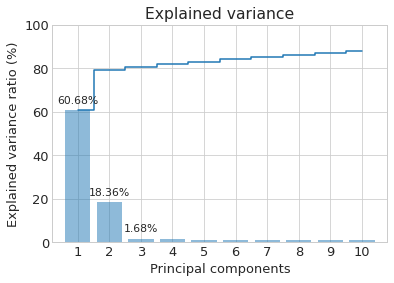

In [35]:
U4,S4,Vt4,XSvd4 = svd(X4_cen,2)
varExp4, cumVarExp4 = expvar(S4,X4_cen)
fig, ax = expvarplot(varExp4,cumVarExp4,10)



In [37]:
Vt4.shape

(33, 33)

In [7]:
with open('variables/IntSVDt3_Vt_c.npy', 'rb') as f:
    Vt4 = np.load(f, allow_pickle=True)

projX1 = X1_cen @ Vt4.T[:,:2]
projX7 = X7_cen @ Vt4.T[:,:2]

# np.save('variables/IntSVDt3_projX1.npy', projX1)
# np.save('variables/IntSVDt3_projX7.npy', projX7)

In [40]:
projX1.shape,y1.shape

((8938866,), (8938866,))

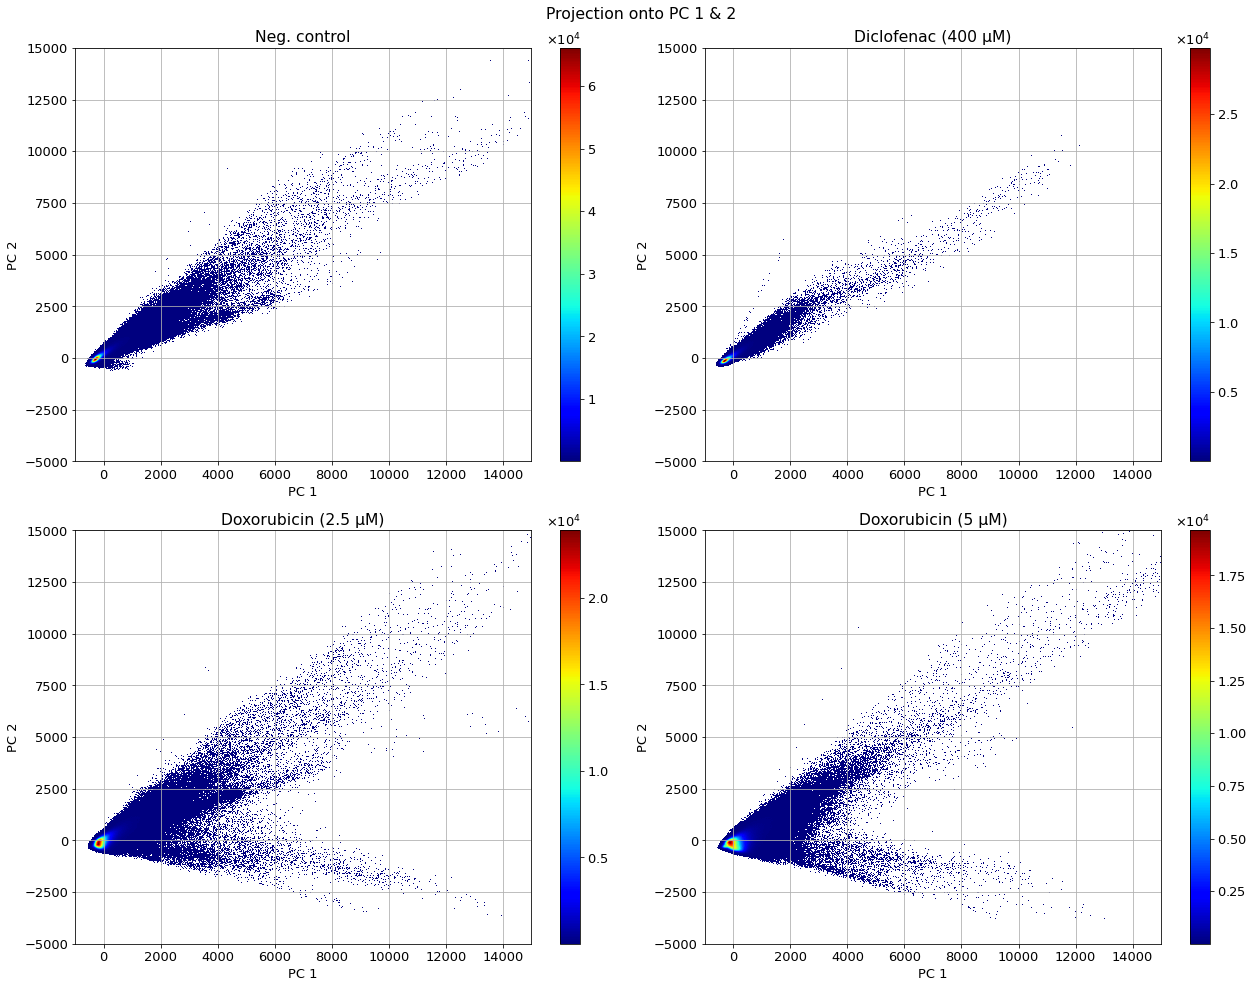

In [44]:
# import pandas as pd
dfXsvd1 = pd.DataFrame(projX1, columns=['pc1','pc2'])
dfXsvd1['class'] = y1
fig, ax = PCprojection(dfXsvd1,[-1000,15000],[-5000,15000])

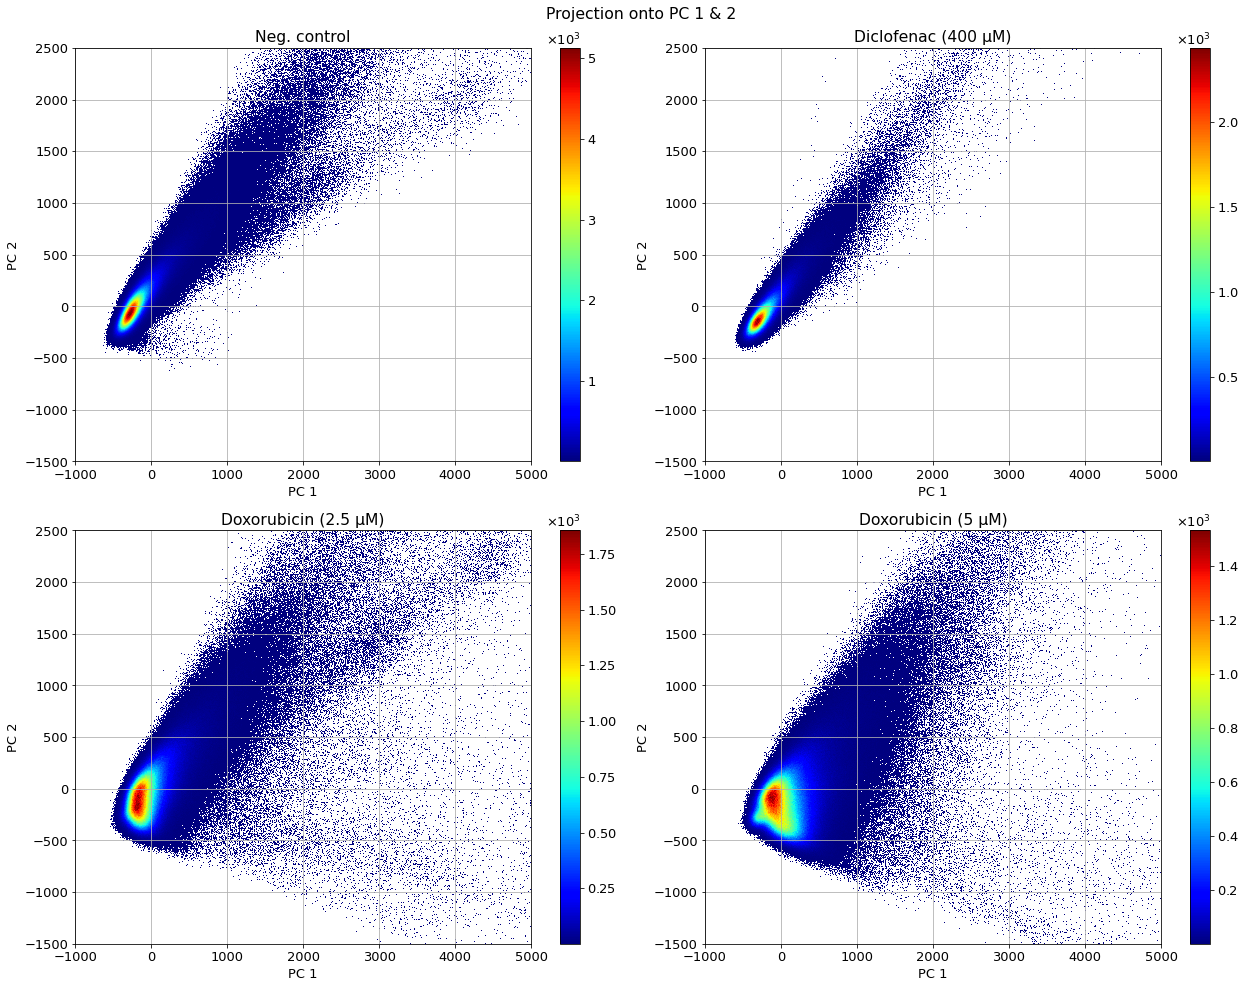

In [45]:
fig2, ax2 = PCprojection(dfXsvd1,[-1000,5000],[-1500,2500])

In [49]:
fig2.savefig("densityPlot2_0103t1.png")

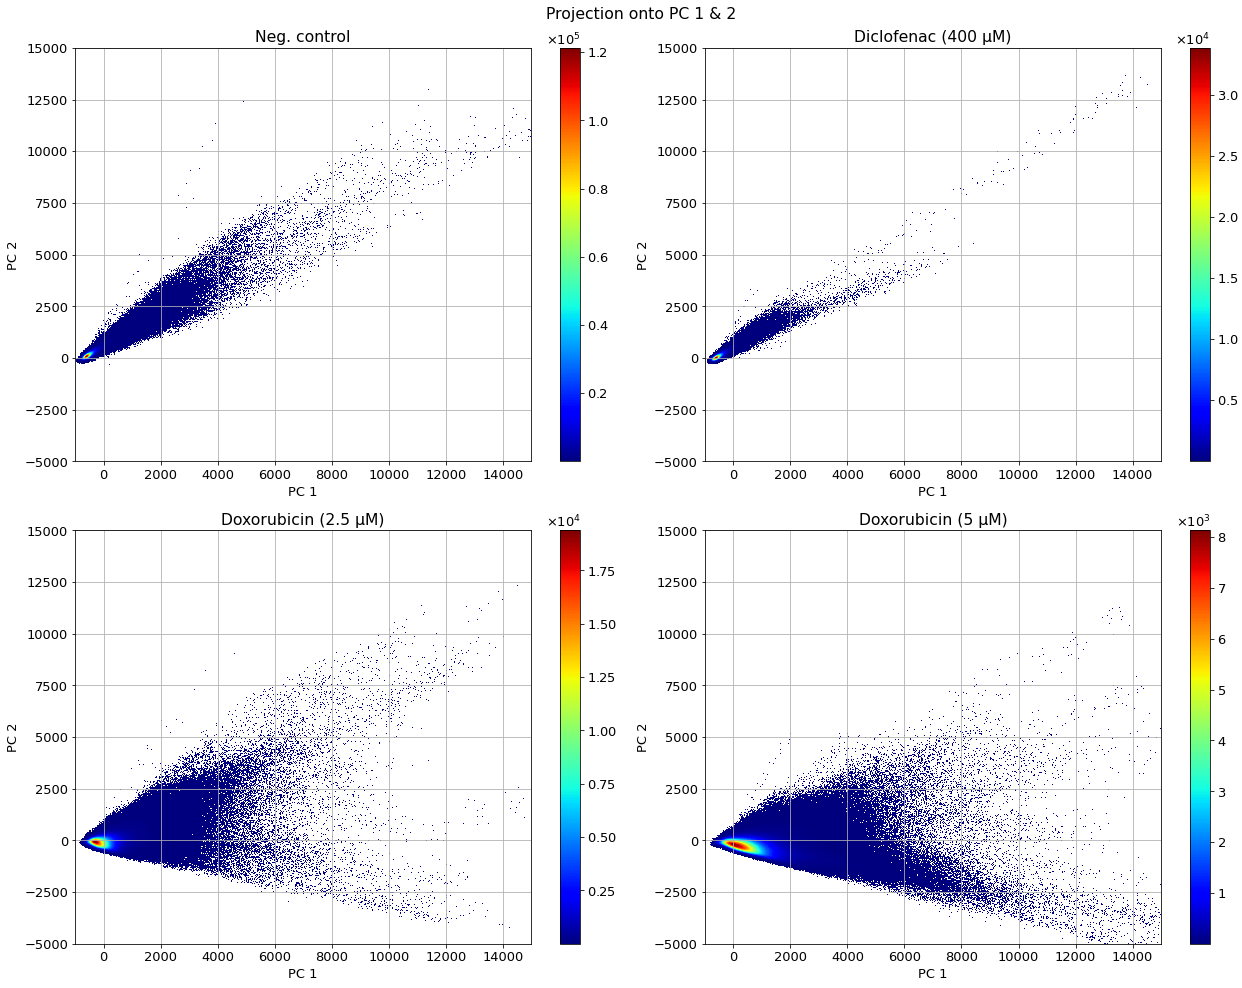

In [50]:
dfXsvd7 = pd.DataFrame(projX7, columns=['pc1','pc2'])
dfXsvd7['class'] = y7
fig3, ax3 = PCprojection(dfXsvd7,[-1000,15000],[-5000,15000])

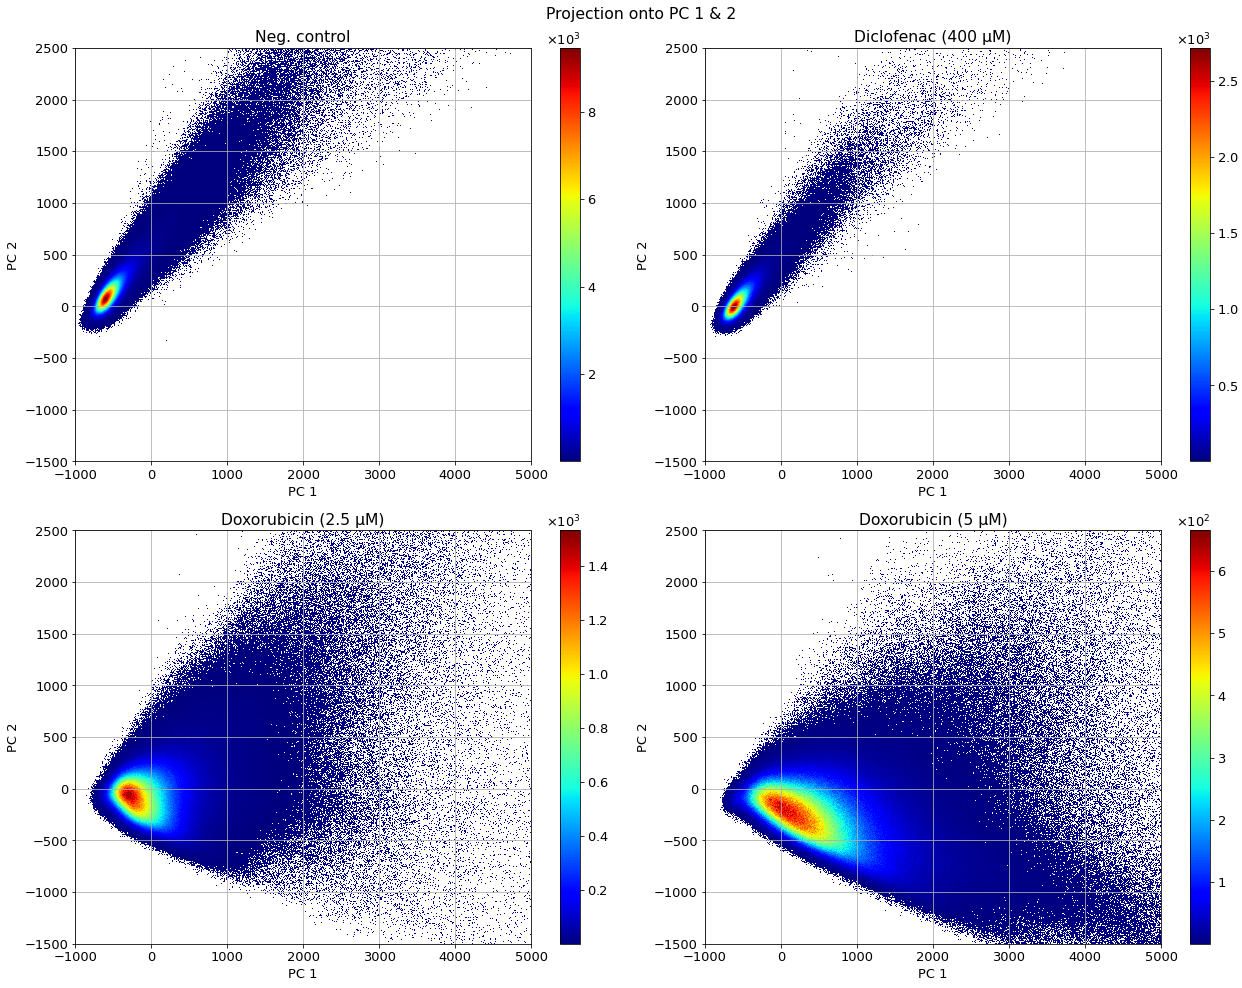

In [51]:
fig4, ax4 = PCprojection(dfXsvd7,[-1000,5000],[-1500,2500])

In [52]:
fig4.savefig("densityPlot2_0103t7.png")

In [12]:
a = np.array([[0,1,2,3,4,5,6],[1,2,3,4,5,6,7],
              [2,3,4,5,6,7,8],[3,4,5,6,7,8,9],
              [4,5,6,7,8,9,10],[5,6,7,8,9,10,11],
              [6,7,8,9,10,11,12],[7,8,9,10,11,12,13],
              [8,9,10,11,12,13,14],[9,10,11,12,13,14,15]])
b = np.array(['f','f','f','g','g','g','g','f','f','f'])
c = np.array([0,0,1,2,1,0,0])
a

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9, 10, 11],
       [ 6,  7,  8,  9, 10, 11, 12],
       [ 7,  8,  9, 10, 11, 12, 13],
       [ 8,  9, 10, 11, 12, 13, 14],
       [ 9, 10, 11, 12, 13, 14, 15]])

In [13]:
a[b=='g']

array([[ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9, 10, 11],
       [ 6,  7,  8,  9, 10, 11, 12]])

In [14]:
a[b=='g'] -= c
a

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  4,  4,  6,  8,  9],
       [ 4,  5,  5,  5,  7,  9, 10],
       [ 5,  6,  6,  6,  8, 10, 11],
       [ 6,  7,  7,  7,  9, 11, 12],
       [ 7,  8,  9, 10, 11, 12, 13],
       [ 8,  9, 10, 11, 12, 13, 14],
       [ 9, 10, 11, 12, 13, 14, 15]])